In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\INZAMUL KHAN\Downloads\Dataset .csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
#data clenaing
#handling the missing values
df=df.dropna(subset=['Votes','Aggregate rating'])

In [6]:

# Ensure 'Votes' column is numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Votes'].quantile(0.25)
Q3 = df['Votes'].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter out outliers
df_filtered = df[(df['Votes'] >= (Q1 - 1.5 * IQR)) & (df['Votes'] <= (Q3 + 1.5 * IQR))]

# Display filtered DataFrame
df_filtered

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
14,6314605,Sodam Korean Restaurant,162,San Juan City,"17 J. Abad Santos Drive, Little Baguio, San Ju...",Little Baguio,"Little Baguio, San Juan City",121.038110,14.598890,Korean,...,Botswana Pula(P),No,No,No,No,3,4.3,Green,Very Good,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,6002025,Masaba��۱,208,Ankara,"Kocatepe Mahallesi, Mithatpa��a Caddesi, No 62...",K۱z۱lay,"K۱z۱lay, Ankara",32.859867,39.919144,"Kebab, Turkish Pizza",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,103
9533,6003879,Zigana Pide,208,Ankara,"Macun Mahallesi, Erciyes ����yerleri Sitesi, 2...",Macunk�_y,"Macunk�_y, Ankara",32.763378,39.946278,Turkish Pizza,...,Turkish Lira(TL),No,No,No,No,2,4.3,Green,Very Good,103
9534,6004089,D�_vero��lu,208,Ankara,"Maltepe Mahallesi, Gen�_lik Caddesi, No 28, �a...",Maltepe,"Maltepe, Ankara",32.842742,39.922536,"Kebab, Desserts, Turkish Pizza",...,Turkish Lira(TL),No,No,No,No,3,4.4,Green,Very Good,131
9535,6000921,D�_vero��lu,208,Ankara,"��mitk�_y Mahallesi, 2432. Cadde (8. Cadde), N...",��mitk�_y,"��mitk�_y, Ankara",32.701775,39.891564,"Kebab, Desserts, Turkish Pizza",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,152


In [22]:
print("\nDescriptive Statistics:")
descriptive_stats = df[['Votes', 'Aggregate rating']].describe()  # Store the statistics in a variable
print(descriptive_stats)

# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv('descriptive_statistics_lv3_tsk2.csv', index=True)


Descriptive Statistics:
              Votes  Aggregate rating
count   9551.000000       9551.000000
mean     156.909748          2.666370
std      430.169145          1.516378
min        0.000000          0.000000
25%        5.000000          2.500000
50%       31.000000          3.200000
75%      131.000000          3.700000
max    10934.000000          4.900000


In [23]:
#Correlation Analysis
correlation = df[['Votes','Aggregate rating']].corr()
print("\nCorrelation between Votes and Aggregate Rating:")
print(correlation)

#Save the correlation to a csv file
correlation.to_csv('Correlation_Analysis_lv3_tsk2.csv',index=True)


Correlation between Votes and Aggregate Rating:
                     Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


In [9]:
#data visualization
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

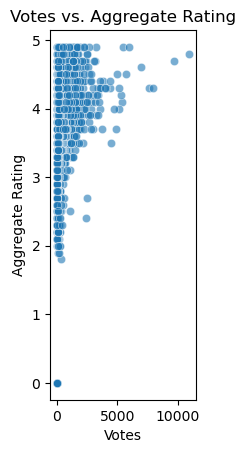

In [24]:
#scatter plot
plt.subplot(1,3,1)
sns.scatterplot(x='Votes', y='Aggregate rating',data=df,alpha=0.6)
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
#save the plot as a  png file
plt.savefig('scatter_plot_lv3_tsk2.png',format='png',dpi=300,bbox_inches='tight')

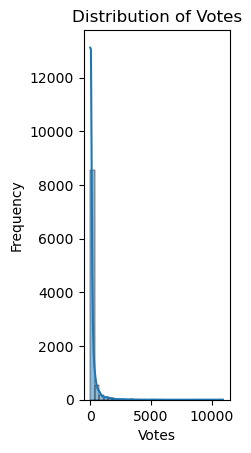

In [25]:
#histogram
plt.subplot(1,3,2)
sns.histplot(df['Votes'],bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
#save the plot as a  png file
plt.savefig('Histogram_lv3_tsk2.png',format='png',dpi=300,bbox_inches='tight')

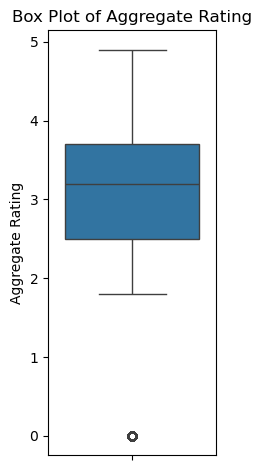

In [18]:
#Box plot
plt.subplot(1,3,3)
sns.boxplot(y='Aggregate rating', data=df)
plt.title('Box Plot of Aggregate Rating')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.savefig('Combined_plots.png',dpi=300,bbox_inches='tight')
plt.show()

In [13]:
#advanced analysiss
#top 5 restuarnatsn with the hightest votes
top_restaurants = df.nlargest(5,'Votes')
print("\n Top 5 Restaurants with Highest Votes:")
print(top_restaurants[['Restaurant Name', 'Votes', 'Aggregate rating']])


 Top 5 Restaurants with Highest Votes:
                Restaurant Name  Votes  Aggregate rating
728                        Toit  10934               4.8
735                    Truffles   9667               4.7
3994           Hauz Khas Social   7931               4.3
2412                  Peter Cat   7574               4.3
739   AB's - Absolute Barbecues   6907               4.6


In [14]:
#Bottom 5 restaurants with the lowest votes
bottom_restaurants = df.nsmallest(5,'Votes')
print("\nBottom 5 Restaurants with Lowest Votes:")
print(bottom_restaurants[['Restaurant Name','Votes','Aggregate rating']])


Bottom 5 Restaurants with Lowest Votes:
        Restaurant Name  Votes  Aggregate rating
69     Cantinho da Gula      0               0.0
874       The Chaiwalas      0               0.0
879  Fusion Food Corner      0               0.0
880       Punjabi Rasoi      0               0.0
887       Baskin Robbin      0               0.0


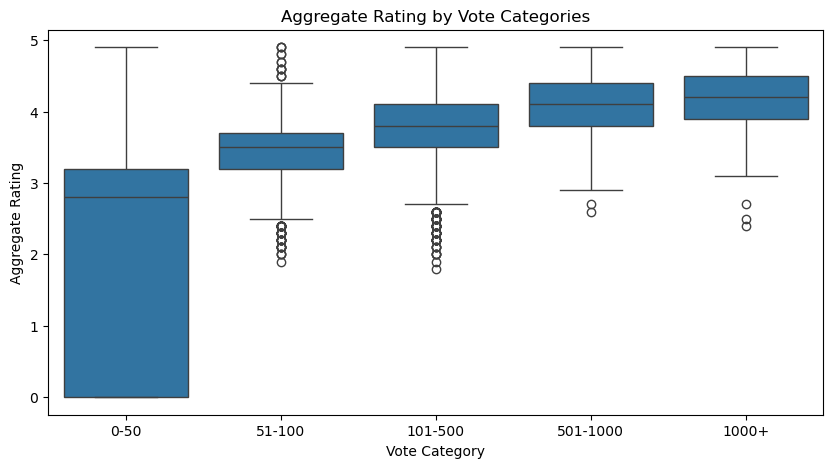

In [19]:
#Rating Distribution by vote count
df['Vote Category'] = pd.cut(df['Votes'], bins=[-1,50,100,500,1000,float('inf')],
                             labels=['0-50','51-100','101-500','501-1000','1000+'])
plt.figure(figsize=(10,5))
sns.boxplot(x='Vote Category', y='Aggregate rating', data=df)
plt.title('Aggregate Rating by Vote Categories')
plt.xlabel('Vote Category')
plt.ylabel('Aggregate Rating')
plt.savefig('rating_by_vote_category_lv3_Task2.png',dpi=300,bbox_inches='tight')
plt.show()

In [16]:
df.to_csv('Cleaned_restaurant_data.csv',index=False)

In [17]:
top_restaurants.to_csv('top_5_restaurants.csv',index=False)
bottom_restaurants.to_csv('bottom_5_restaurants.csv',index=False)